In [1]:
# Covid Exploratory Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 1.1: Reporting number of COVID-19 cases in each London local authority 
First, read the “cases.csv” dataset into a dataframe. Create a new dataframe where rows are the unique names of London local authorities and the columns are the total number of covid cases in each London local authority (include both count columns in the starting dataframe).

In [3]:
df_cases=pd.read_csv("cases.csv",sep=",")
df_cases.head()

,MSOA11CD,MSOA11NM,Local authority,covid_19_deaths,covid_19_deaths_per_thousand
0,E02000001,City of London 001,City of London,3,0.344590
1,E02000002,Barking and Dagenham 001,Barking and Dagenham,2,0.259067
2,E02000003,Barking and Dagenham 002,Barking and Dagenham,3,0.271469
3,E02000004,Barking and Dagenham 003,Barking and Dagenham,9,1.366535
4,E02000005,Barking and Dagenham 004,Barking and Dagenham,5,0.488806


In [4]:
# Assumption: The geographical locations have similar population size for as estimated number for covid_19_deaths_per_thousand column, since population data is from mid 2018 which may vary from the actual 2020 numbers.
new_df_cases=df_cases.groupby('Local authority',as_index=False).agg({'covid_19_deaths':'sum','covid_19_deaths_per_thousand':'mean'})
new_df_cases.head()

,Local authority,covid_19_deaths,covid_19_deaths_per_thousand
0,Barking and Dagenham,103,0.501532
1,Barnet,287,0.735584
2,Bexley,125,0.523265
3,Brent,304,0.914662
4,Bromley,152,0.457759


### 1.2: Calculating percentage of COVID-19 cases in each London local authority 
Read the “population.csv” dataset and calculate the percentage of covid cases in each city of London region according to the total population and add it as a new column to the datafame. Sort the dataframe according to this column.


In [5]:
df_population=pd.read_csv('population.csv')
df_population.head()

# Assumption: The geographical locations have similar population size for as estimated number for the over_70_prop column.

new_df_population=df_population.groupby('Local authority',as_index=False).agg({'total_population_mid_2018':'sum','over_70_prop':'mean'})
new_df_population.head()
new_df_cases=pd.merge(new_df_cases,new_df_population,on='Local authority',how='outer')
new_df_cases.head()

,Local authority,covid_19_deaths,covid_19_deaths_per_thousand,total_population_mid_2018,over_70_prop
0,Barking and Dagenham,103,0.501532,211998,0.066743
1,Barnet,287,0.735584,392140,0.104650
2,Bexley,125,0.523265,247258,0.124081
3,Brent,304,0.914662,330795,0.085853
4,Bromley,152,0.457759,331096,0.131820


In [6]:
# Adding percentage_of_cases column with unit %
new_df_cases['percentage_of_cases(%)']=new_df_cases['covid_19_deaths']/new_df_cases['total_population_mid_2018']*100

# Sorted the column in descending order to see Local authorities with the highest percentage of cases
new_df_cases=new_df_cases.sort_values('percentage_of_cases(%)',ascending=False)
new_df_cases.head()

,Local authority,covid_19_deaths,covid_19_deaths_per_thousand,total_population_mid_2018,over_70_prop,percentage_of_cases(%)
14,Harrow,241,0.961620,250149,0.114148,0.096343
3,Brent,304,0.914662,330795,0.085853,0.091900
1,Barnet,287,0.735584,392140,0.104650,0.073188
8,Ealing,239,0.707447,341982,0.089893,0.069887
9,Enfield,220,0.662412,333869,0.098564,0.065894


### 1.3: Finding the largest and smallest population based on ethnicity group in each city of London

Read the “ethnic.csv” dataset and calculate the population of different ethnicity groups in each London borough using column “total\_population\_mid\_2018” from the first dataset “cases.csv”. Plot a bar chart to compare cases in each ethnicity group for each London local authority.

In [7]:
df_ethnic=pd.read_csv('ethnic.csv',sep=',')
# df_ethnic = df_ethnic.rename(columns={'Local Authority': 'Local authority'})

ethnicity_by_boroughs=df_ethnic[['all_bame_prop','all_black_prop','pakistani_or_bangladeshi_prop','all_indian_prop']].multiply(df_population['total_population_mid_2018'],axis=0)

ethnicity_by_boroughs=ethnicity_by_boroughs.rename(columns={'all_bame_prop':'bame_population','all_black_prop':'black_population','pakistani_or_bangladeshi_prop':'pakistani_bangladeshi_population','all_indian_prop':'indian_population'})
ethnicity_by_boroughs.insert(0,'Local Authority',df_ethnic['Local Authority'])
ethnicity_by_boroughs=ethnicity_by_boroughs.groupby('Local Authority',as_index=False).sum()

# Calculating the population of other minorities within BAME who are not black, pakistani or bangladeshi, or indian.
ethnicity_by_boroughs['other_minority_population']=ethnicity_by_boroughs['bame_population']-ethnicity_by_boroughs['black_population']-ethnicity_by_boroughs['pakistani_bangladeshi_population']-ethnicity_by_boroughs['indian_population']
ethnicity_by_boroughs.head()

,Local Authority,bame_population,black_population,pakistani_bangladeshi_population,indian_population,other_minority_population
0,Barking and Dagenham,89035.227013,42377.522812,18196.829154,8663.394411,19797.480637
1,Barnet,142508.775250,30581.176527,8545.646001,31044.115686,72337.837036
2,Bexley,45457.720206,21483.158912,1611.827266,7523.398928,14839.335100
3,Brent,212080.735332,62903.271137,17232.359567,62202.038047,69743.066580
4,Bromley,52630.840886,20416.876853,2451.501883,6683.835140,23078.627010


Text(0, 0.5, 'Population')

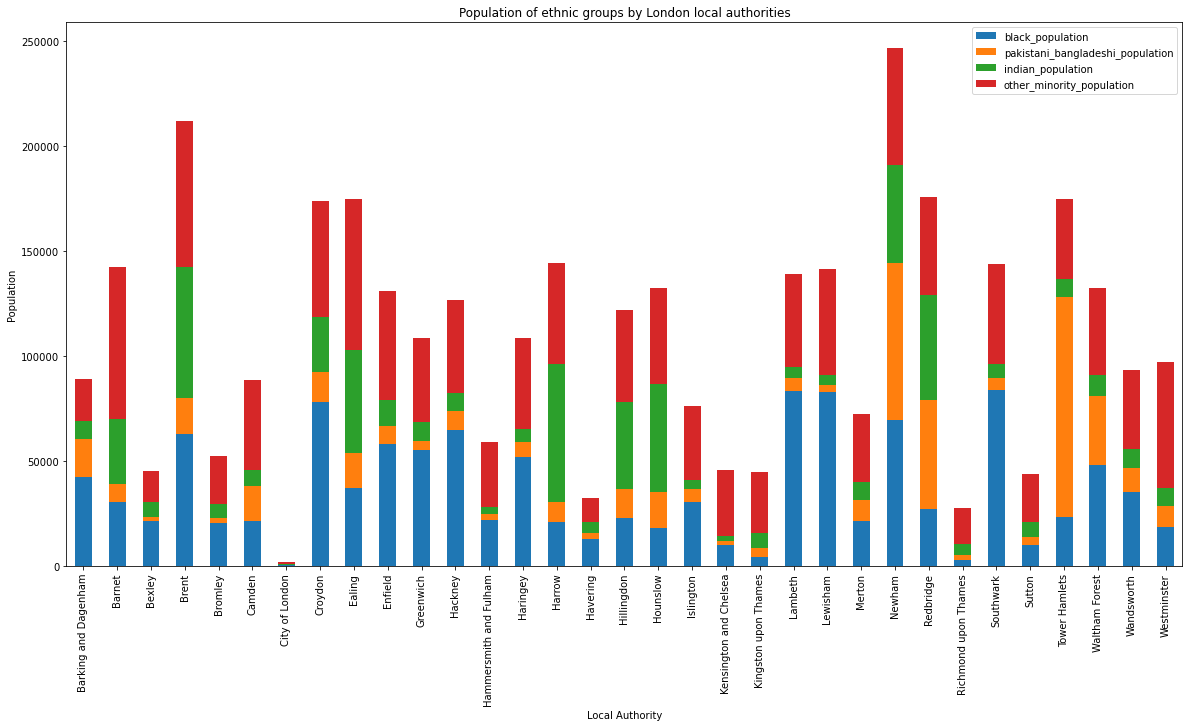

In [8]:
# Excluding the white population under the assumption that this chart is just to analyse the population of minority groups in London local authority.
# Excluding BAME population column from this chart as the total population plotted, i.e. black, pakistani & bangladeshi, indian and other minorities, add up to the total BAME population.
ethnicity_chart=ethnicity_by_boroughs.plot.bar(x='Local Authority',y=['black_population','pakistani_bangladeshi_population','indian_population','other_minority_population'],title='Population of ethnic groups by London local authorities',figsize=(20,10),stacked=True)
ethnicity_chart.set_ylabel("Population")
# Assuming that the intention of this chart is to understand if there is a disporportionate impact of the virus against minorities, it would be helpful to have the covid cases data by each ethnic group.


### 1-4: Analysing the medical conditions of each region
Read the “medical.csv” dataset. Calculate total percentage of patients with “Hypertension”, “Obesity (18+)”, “Diabetes”, “Asthma”, and “Coronary heart disease” for each London local authority. For each medical condition, draw a boxplot of medical case frequencies for the 5 regions with the highest "total\_registered\_patient". Then, add a new column to the daraframe from section 1.2 to show the medical conditions with the highest number patients in each London borough.  

Text(0.5, 1.0, 'Medical cases for the 5 regions with the highest number of registered patients')

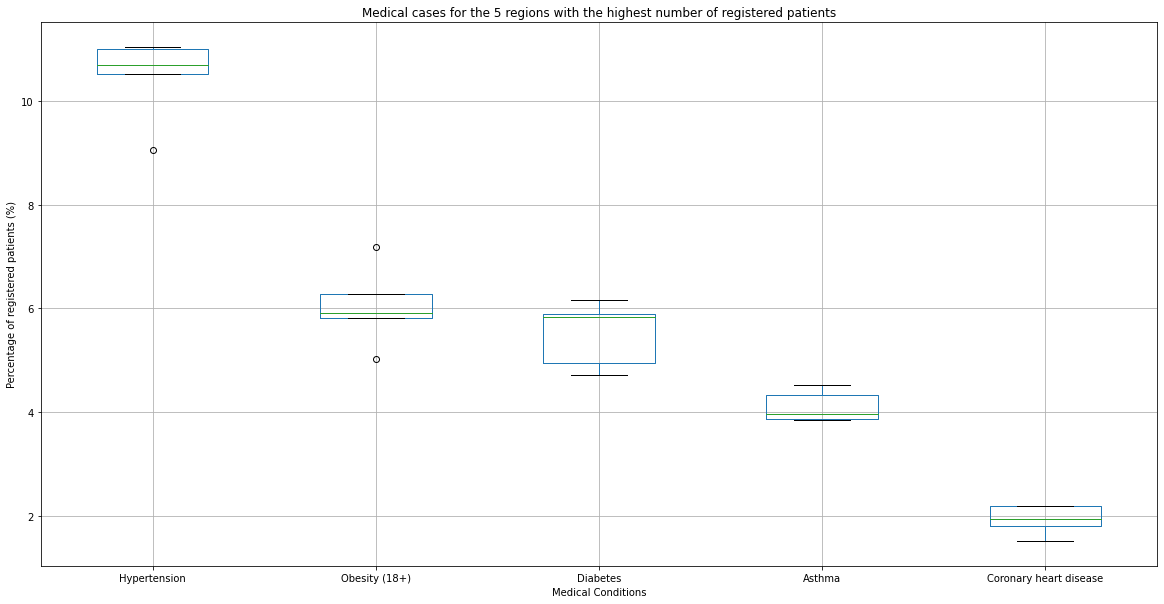

In [9]:
df_medical=pd.read_csv('medical.csv',sep=',')
# Assuming that the data for each medical conditions is independent from each other.
medical_condition_population=df_medical[['Hypertension','Obesity (18+)','Diabetes','Asthma','Coronary heart disease']].multiply(df_medical['total_registered_patients'],axis=0)
# Dividing the population by 100 as previous numbers were in percentages and not proportions.
medical_condition_population=medical_condition_population/100

# Adding the Local Authority and Total registered patients columns for analysis - to groupby Local authority and calculate the percentage of the medical conditions by local authority
medical_condition_population.insert(0,'Local authority',df_medical['Local authority'])
medical_condition_population.insert(1,'total_registered_patients',df_medical['total_registered_patients'])
medical_condition_population=medical_condition_population.groupby('Local authority',as_index=False).sum()
# Calculating the total percentages for each medical condition by local authority
medical_condition_population['Hypertension']=medical_condition_population['Hypertension']/medical_condition_population['total_registered_patients']*100
medical_condition_population['Obesity (18+)']=medical_condition_population['Obesity (18+)']/medical_condition_population['total_registered_patients']*100
medical_condition_population['Diabetes']=medical_condition_population['Diabetes']/medical_condition_population['total_registered_patients']*100
medical_condition_population['Asthma']=medical_condition_population['Asthma']/medical_condition_population['total_registered_patients']*100
medical_condition_population['Coronary heart disease']=medical_condition_population['Coronary heart disease']/medical_condition_population['total_registered_patients']*100

# Sorting the data to see regions with the highest number of registered patients
medical_condition_population=medical_condition_population.sort_values('total_registered_patients',ascending=False)

top_5_regions=medical_condition_population.head()
# The 5 regions with the highest Total Registered Patients are Ealing, Croydon, Barnet, Newham and Brent.
medical_top_5=top_5_regions.boxplot(column=['Hypertension','Obesity (18+)','Diabetes','Asthma','Coronary heart disease'],figsize=(20,10))
medical_top_5.set_xlabel('Medical Conditions')
medical_top_5.set_ylabel('Percentage of registered patients (%)')
plt.title('Medical cases for the 5 regions with the highest number of registered patients')

In [10]:
# Assumption: Adding column to show the most common medical condition within each local authority, i.e. stating which medical condition has the highest number of patients.
# Finding the most common medical condition by local authority.
medical_condition_population['Most common medical condition'] = medical_condition_population[['Hypertension','Obesity (18+)','Diabetes','Asthma','Coronary heart disease']].idxmax(axis=1)
new_df_cases = pd.merge(new_df_cases,medical_condition_population[['Local authority','Most common medical condition']],on='Local authority', how='left')
new_df_cases.head()
# As seen in the boxplot, and further confirmed by the newly added column, Hypertension is the most common medical condition for all local authorities.

,Local authority,covid_19_deaths,covid_19_deaths_per_thousand,total_population_mid_2018,over_70_prop,percentage_of_cases(%),Most common medical condition
0,Harrow,241,0.961620,250149,0.114148,0.096343,Hypertension
1,Brent,304,0.914662,330795,0.085853,0.091900,Hypertension
2,Barnet,287,0.735584,392140,0.104650,0.073188,Hypertension
3,Ealing,239,0.707447,341982,0.089893,0.069887,Hypertension
4,Enfield,220,0.662412,333869,0.098564,0.065894,Hypertension



### 2.1: Reading in the datasets
Read columns "country, date, cases" from file "confirmed\_cases\_by\_country.csv" into a dataframe called "cases\_by\_country".
Read columns "is\_china, date, cases" from "confirmed\_cases\_china\_vs\_world.csv" into a dataframe called "cases\_all". Rename the column "is\_china" to "country" (hint you may use .rename()). Then split this dataframe into two new ones: cases in China ("cases\_china") and cases elsewhere ("cases\_not\_china"). 

In [11]:
cases_by_country=pd.read_csv("confirmed_cases_by_country.csv",usecols=['country','date','cases'])
cases_by_country.head()

,country,date,cases
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Antigua and Barbuda,2020-01-22,0


In [12]:
cases_all=pd.read_csv("confirmed_cases_china_vs_world.csv",usecols=["is_china","date","cases"])
cases_all = cases_all.rename(columns={'is_china': 'country'})
cases_all.head()

,country,date,cases
0,China,2020-01-22,548
1,China,2020-01-23,95
2,China,2020-01-24,277
3,China,2020-01-25,486
4,China,2020-01-26,669


In [13]:
cases_china=cases_all.loc[cases_all['country']=='China'].copy()
cases_not_china=cases_all.drop(cases_china.index[:])
cases_china.head()

,country,date,cases
0,China,2020-01-22,548
1,China,2020-01-23,95
2,China,2020-01-24,277
3,China,2020-01-25,486
4,China,2020-01-26,669


### 2.2: Summarising the total number of confirmed cases by country
Obtain the January records for "cases_by_country" and "cases_china" and summarise cases in China against cases in other countries in a dataframe for this month. Repeat this procedure for February and March. Create a bar plot to compare cases in China with cases in the 5 countries with most cases outside China for January, February and March.

In [14]:
cases_china['date'] = pd.to_datetime(cases_china['date'])
china=cases_china.copy()
china.insert(0,'month',china['date'].dt.month_name())
china=china.groupby(['month','country'])['cases'].sum().reset_index()
china.head()

,month,country,cases
0,February,China,69554
1,January,China,9802
2,March,China,1702


In [15]:
cases_by_country['date'] = pd.to_datetime(cases_by_country['date'])
countries=cases_by_country.copy()
countries.insert(0,'month',countries.date.dt.month_name())
countries=countries.groupby(['month','country'])['cases'].sum().reset_index()
countries.head()

,month,country,cases
0,February,Afghanistan,1
1,February,Albania,0
2,February,Algeria,1
3,February,Andorra,0
4,February,Antigua and Barbuda,0


In [16]:
# January cases
jan_cases=countries.loc[countries['month']=='January'].sort_values(by='cases',ascending=False)
china_jan= china.loc[china['month'] == 'January']
jan_cases=pd.concat([china_jan,jan_cases])
jan_cases

# February cases
feb_cases=countries.loc[countries['month']=='February'].sort_values(by='cases',ascending=False)
china_feb= china.loc[china['month'] == 'February']
feb_cases=pd.concat([china_feb,feb_cases])
feb_cases

# March cases
mar_cases=countries.loc[countries['month']=='March'].sort_values(by='cases',ascending=False)
china_mar= china.loc[china['month'] == 'March']
mar_cases=pd.concat([china_mar,mar_cases])
mar_cases

,month,country,cases
2,March,China,1702
371,March,Italy,30378
367,March,Iran,15576
430,March,Spain,11703
353,March,Germany,9178
...,...,...,...
345,March,Equatorial Guinea,1
347,March,Eswatini,1
391,March,Mauritania,1
399,March,Nepal,0


Text(0, 0.5, 'Number of Cases')

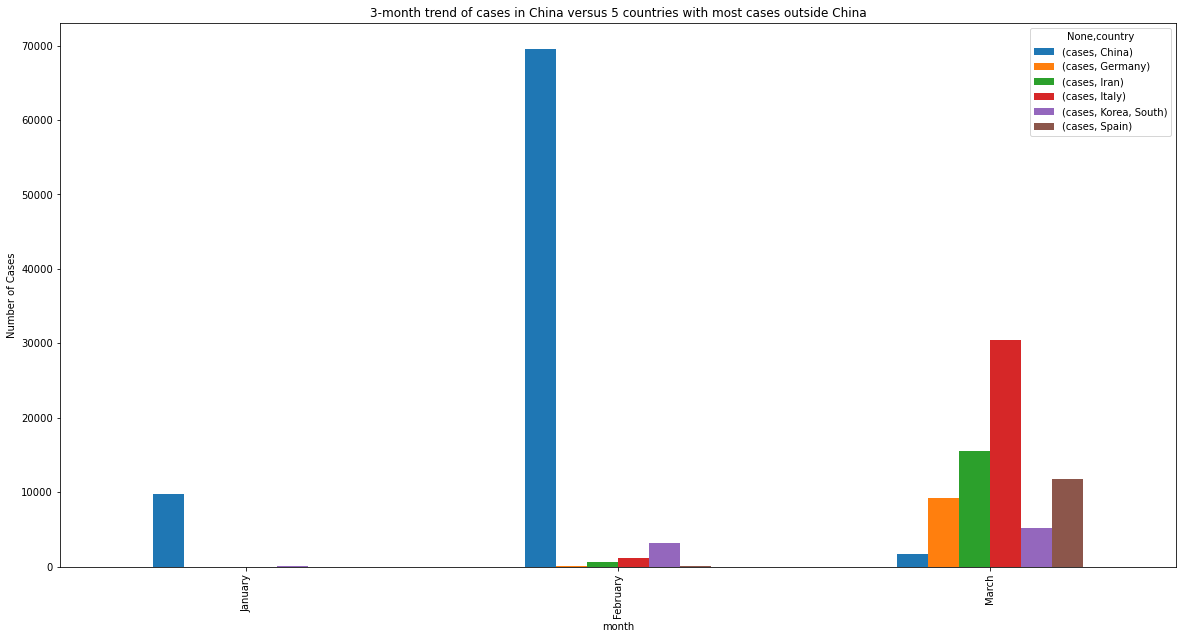

In [17]:
# Assumption: Comparing China's cases with 5 countries with most cumulative cases outside China for January to March
countries=countries.groupby(['country'])['cases'].sum().reset_index()
countries.sort_values(by='cases',ascending=False).head()

# The top 5 countries with the highest cumulative cases from Jan to Mar are Italy, Iran, Spain, Germany and South Korea. Creating a list to filter the monthly dataframes for only these countries.
comparing_countries=['China','Italy','Iran','Spain','Germany','Korea, South']
top_5_and_china_jan=jan_cases.loc[jan_cases['country'].isin(comparing_countries)]
top_5_and_china_feb=feb_cases.loc[feb_cases['country'].isin(comparing_countries)]
top_5_and_china_mar=mar_cases.loc[mar_cases['country'].isin(comparing_countries)]
top_5_countries_vs_china=pd.concat([top_5_and_china_jan,top_5_and_china_feb, top_5_and_china_mar],ignore_index=True)

# Structuring data for graphical analysis
top_5_countries_vs_china=top_5_countries_vs_china.set_index(['month','country'])
top_5_countries_vs_china=top_5_countries_vs_china.unstack()

# Arranging the months in order using categorical indexing
top_5_countries_vs_china.index = pd.CategoricalIndex(top_5_countries_vs_china.index, categories=['January','February','March'], ordered=True)
top_5_countries_vs_china = top_5_countries_vs_china.sort_index()
jan_mar_trend=top_5_countries_vs_china.plot.bar(title='3-month trend of cases in China versus 5 countries with most cases outside China',figsize=(20,10))
jan_mar_trend.set_ylabel('Number of Cases')

### 2.3: Plotting the accumulated cases by date 
Add a new column called "acc_cases" in both "cases_not_china" and "cases_china" dataframes, which contains the accumulated number of cases by date. Create a time series plot for "acc_cases" column in "cases_not_china" dataframe.

Text(0, 0.5, 'Number of Cases')

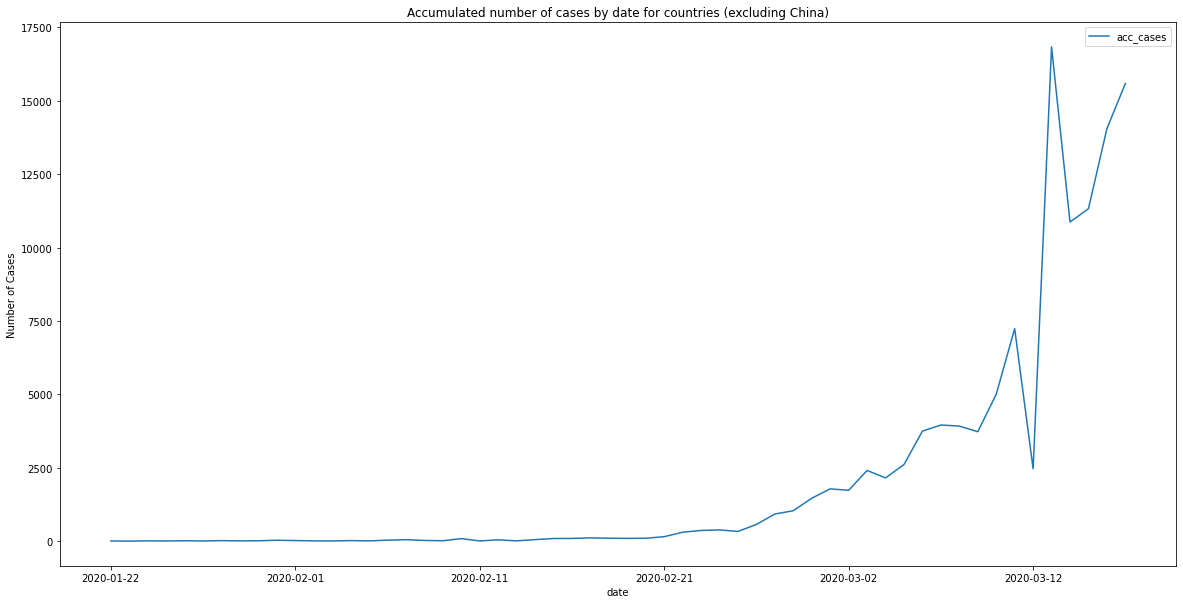

In [18]:
# Case 1 for Assumption 1
# Assumption 1: Accumulated number of cases by date refers to the total number of daily cases.
cases_china['acc_cases'] = cases_china.groupby(['date']).cumsum()
cases_not_china['acc_cases']=cases_not_china.groupby(['date']).cumsum()
accumulated_cases=cases_not_china.plot(x='date',y='acc_cases',title="Accumulated number of cases by date for countries (excluding China)",figsize=(20,10))
accumulated_cases.set_ylabel('Number of Cases')
# This graph makes it easier to spot specific dates where the daily cases spiked.

Text(0, 0.5, 'Number of Cases')

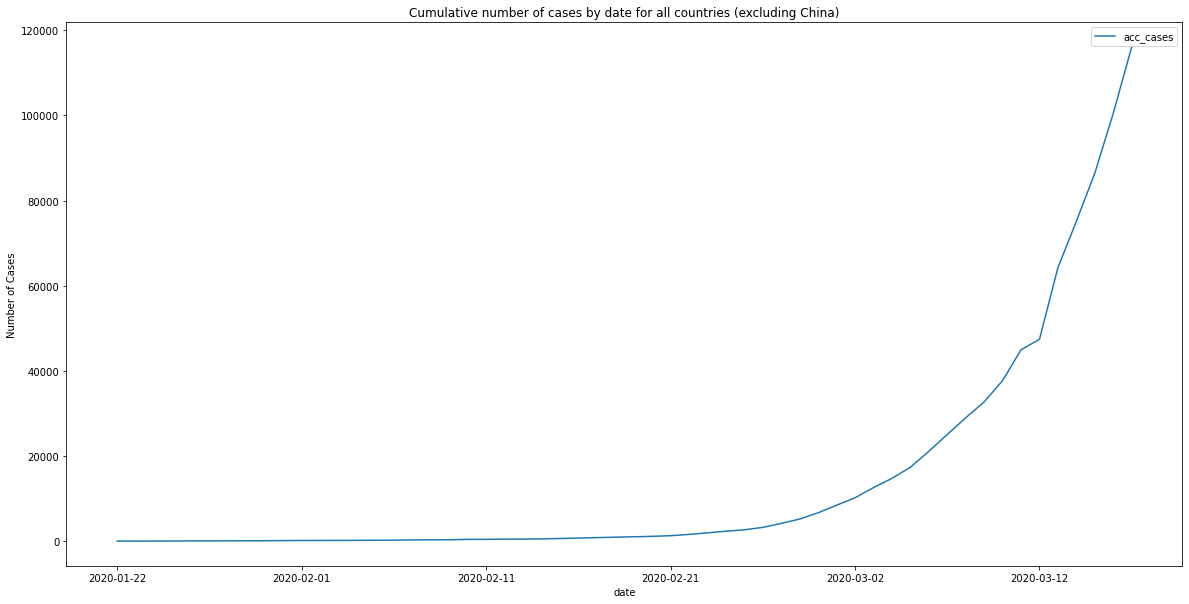

In [19]:
# Case 2 for Assumption 2
# Assumption 2: Accumulated number of cases by date refers to the cumulative number of daily cases.
cases_not_china['acc_cases']=cases_not_china['cases'].cumsum()
cumulative_cases=cases_not_china.plot(x='date',y='acc_cases',title="Cumulative number of cases by date for all countries (excluding China)",figsize=(20,10))
cumulative_cases.set_ylabel('Number of Cases')
# This graph helps visualise where the rate of infections rise exponentially.

### 2.4: Analysing across countries 
When the number of COVID-19 cases became higher than 10,000 in China, what was the number of cases for all other counties in that day? Print the 5 countries with highest number of cases.

During the first 5 days that the daily cases in China dropped below 100, what is average number of cases for other countries? Report the top 5 countries with average number of cases.

In [20]:
# Finding the date(s) where daily cases in China were beyond 10,000
more_than_10k_china=cases_china.loc[(cases_china['cases']>10000)]
more_than_10k_china
# China had only one instance between January to March where daily cases exceeded 10,000, which was on the 13th of February 2020, where they had 15,136 new cases.

february13_other_countries=cases_by_country.loc[(cases_by_country['date']=='2020-02-13')]
february13_other_countries=february13_other_countries.groupby(['country']).sum()
february13_other_countries.sort_values('cases',ascending=False).head()
# On the date when China had more than 10,000 cases, Singapore had 8 cases, Vietnam had 1 case, US had 1 case and Malaysia had 1 case.

,cases
country,
Singapore,8
Vietnam,1
US,1
Malaysia,1
Philippines,0


In [21]:
# Finding the first 5 days that the daily cases in China dropped below 100
less_than_100_china=cases_china.loc[(cases_china['cases']<100)]
less_than_100_china=less_than_100_china['date'].head(5).tolist()
dates_below_100_cases_countries=cases_by_country.loc[cases_by_country['date'].isin(less_than_100_china)]

# Assumption: The average number of cases for other countries is the average number of daily cases on the first 5 dates where China had less than 100 daily cases.
dates_below_100_cases_countries=dates_below_100_cases_countries.groupby(['country'])['cases'].mean().reset_index()
dates_below_100_cases_countries=dates_below_100_cases_countries.sort_values('cases',ascending=False)
top_5_highest_average=dates_below_100_cases_countries['country'].head().tolist()
print("The top 5 countries with the highest average number of cases are {}".format(top_5_highest_average))

The top 5 countries with the highest average number of cases are ['Italy', 'Iran', 'Korea, South', 'Spain', 'Germany']
